In [85]:
#Defining the function and generation of data(rosenbrock, n=9)
import numpy as np
import pandas as pd
import random
l=2500 #no of datasets
n=9
inputs = np.random.uniform(-1.0, 1.0, size = (l,n)) #keeping the range of the function as (-1,1)
x1 = inputs[:,0]
x2 = inputs[:,1]
x3 = inputs[:,2]
x4 = inputs[:,3]
x5 = inputs[:,4]
x6 = inputs[:,5]
x7 = inputs[:,6]
x8 = inputs[:,7]
x9 = inputs[:,8]
Y = []
for j in range(l):
    r=0
    for i in range(n-1):
        r = r + (1.0 - inputs[j][i])**2+100.0*((inputs[j][i+1]-inputs[j][i]**2)**2)  #rosenbrock function
    Y.append(r)


In [86]:
# Creating a dataframe for the data generated above
import pandas as pd
data=zip(x1, x2, x3, x4, x5, x6, x7, x8, x9,Y)
data_to_excel=pd.DataFrame(data)
data_to_excel

,0,1,2,3,4,5,6,7,8,9
0,0.486881,-0.773397,-0.050534,0.084568,-0.032604,-0.736818,0.295694,0.497740,-0.561831,298.125329
1,0.629629,0.957705,-0.659850,0.121552,0.824153,0.828809,-0.006234,0.237842,0.895073,487.138146
2,-0.712852,0.948625,0.572676,0.660235,-0.214652,0.542341,-0.398283,-0.982550,-0.914472,650.471675
3,-0.432045,0.884390,-0.044217,-0.804677,-0.516557,0.775618,-0.645234,0.445783,0.959935,568.687717
4,0.179924,0.043875,0.216944,-0.876370,-0.753894,0.685081,0.842100,0.230466,-0.526571,402.819802
...,...,...,...,...,...,...,...,...,...,...
2495,0.467579,-0.860763,0.800176,-0.560314,-0.392197,0.018670,-0.938476,-0.842295,-0.976001,998.068631
2496,0.833969,-0.392949,0.347030,-0.678596,0.920039,-0.584858,-0.387439,-0.669473,0.843922,560.507127
2497,0.202129,-0.514602,0.105609,-0.849493,0.763000,0.491210,0.295731,-0.483899,-0.334942,183.950358
2498,-0.176911,-0.005577,-0.846307,0.465155,0.474745,0.610356,-0.262790,0.604143,-0.765866,304.714127


In [87]:
#Saving the data generated as excel file
data_to_excel.to_excel('C:\\Users\\satya\\rosenbrock.xlsx')


In [88]:
#Reading the data from the excel file created in the previous step
import pandas as pd
data1=pd.read_excel('C:\\Users\\satya\\rosenbrock.xlsx')
data1

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,0,0.486881,-0.773397,-0.050534,0.084568,-0.032604,-0.736818,0.295694,0.497740,-0.561831,298.125329
1,1,0.629629,0.957705,-0.659850,0.121552,0.824153,0.828809,-0.006234,0.237842,0.895073,487.138146
2,2,-0.712852,0.948625,0.572676,0.660235,-0.214652,0.542341,-0.398283,-0.982550,-0.914472,650.471675
3,3,-0.432045,0.884390,-0.044217,-0.804677,-0.516557,0.775618,-0.645234,0.445783,0.959935,568.687717
4,4,0.179924,0.043875,0.216944,-0.876370,-0.753894,0.685081,0.842100,0.230466,-0.526571,402.819802
...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,0.467579,-0.860763,0.800176,-0.560314,-0.392197,0.018670,-0.938476,-0.842295,-0.976001,998.068631
2496,2496,0.833969,-0.392949,0.347030,-0.678596,0.920039,-0.584858,-0.387439,-0.669473,0.843922,560.507127
2497,2497,0.202129,-0.514602,0.105609,-0.849493,0.763000,0.491210,0.295731,-0.483899,-0.334942,183.950358
2498,2498,-0.176911,-0.005577,-0.846307,0.465155,0.474745,0.610356,-0.262790,0.604143,-0.765866,304.714127


In [89]:
#Normalizing the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data1.values)

In [90]:
X=scaled_data[:,1:10]
y=scaled_data[:,10]

In [91]:
#Splitting the data using sklearn function
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0) #Random state: to obtain the same data every time we run kernel

In [92]:
X_train.shape #to know the size of the dataset

(2125, 9)

In [93]:
#Creating sequential ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [94]:
#Creating ANN with mentioned nodes, hidden layers,inputs,outputs and activation function
model=Sequential()
model.add(Dense(100,input_dim=9,activation='relu'))
model.add(Dense(110,activation='relu'))
model.add(Dense(1,activation='linear'))

In [95]:
print(model.summary()) #model summary of total,trainable and non trainable parameters

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1000      
                                                                 
 dense_13 (Dense)            (None, 110)               11110     
                                                                 
 dense_14 (Dense)            (None, 1)                 111       
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
#Training the ANN using adam optimiser and MSE as loss fn.
model.compile(optimizer='adam',loss='MSE')

In [97]:
#Validation splits and iterations
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
57/57 [==============================] - 1s 5ms/step - loss: 0.0319 - val_loss: 0.0149
Epoch 2/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.0088
Epoch 3/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 5/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0068
Epoch 6/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 9/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 10/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 3.7006e-04 - val_loss: 0.0015
Epoch 82/100
57/57 [==============================] - 0s 1ms/step - loss: 2.7106e-04 - val_loss: 0.0017
Epoch 83/100
57/57 [==============================] - 0s 2ms/step - loss: 2.8129e-04 - val_loss: 0.0015
Epoch 84/100
57/57 [==============================] - 0s 2ms/step - loss: 2.6442e-04 - val_loss: 0.0014
Epoch 85/100
57/57 [==============================] - 0s 2ms/step - loss: 2.7713e-04 - val_loss: 0.0014
Epoch 86/100
57/57 [==============================] - 0s 2ms/step - loss: 2.7035e-04 - val_loss: 0.0015
Epoch 87/100
57/57 [==============================] - 0s 1ms/step - loss: 3.8468e-04 - val_loss: 0.0016
Epoch 88/100
57/57 [==============================] - 0s 2ms/step - loss: 3.5963e-04 - val_loss: 0.0016
Epoch 89/100
57/57 [==============================] - 0s 1ms/step - loss: 3.1549e-04 - val_loss: 0.0015
Epoch 90/100
57/57 [==============================] - 0s 2ms/step - loss: 3.6

In [98]:
from sklearn.metrics import r2_score

In [99]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 1ms/step


In [100]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.9815740374443199

In [101]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 1ms/step


0.9165761145109176

In [102]:
#Mean squared error for training data
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

67/67 [==============================] - 0s 937us/step


0.00045796523246339474

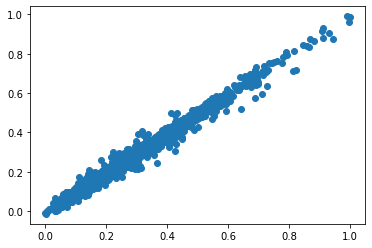

In [103]:
#Plotting scatter plot graphs for train ansd test data using the matplotlib function
from matplotlib import pyplot as p
p.scatter(y_train, y_pred)

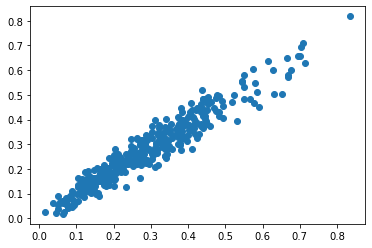

In [104]:
p.scatter(y_test,y_test_pre)

Training same network using RMSProp optimizer


In [64]:
#Training the ANN using RMSProp optimiser and MSE loss f.
model.compile(optimizer='RMSProp',loss='MSE')


In [65]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.15)

Epoch 1/100
57/57 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 10/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 6.2519e-04 - val_loss: 0.0019
Epoch 81/100
57/57 [==============================] - 0s 1ms/step - loss: 4.9367e-04 - val_loss: 0.0031
Epoch 82/100
57/57 [==============================] - 0s 1ms/step - loss: 5.8609e-04 - val_loss: 0.0018
Epoch 83/100
57/57 [==============================] - 0s 2ms/step - loss: 5.9191e-04 - val_loss: 0.0020
Epoch 84/100
57/57 [==============================] - 0s 2ms/step - loss: 5.0047e-04 - val_loss: 0.0022
Epoch 85/100
57/57 [==============================] - 0s 2ms/step - loss: 5.9477e-04 - val_loss: 0.0025
Epoch 86/100
57/57 [==============================] - 0s 2ms/step - loss: 5.3909e-04 - val_loss: 0.0026
Epoch 87/100
57/57 [==============================] - 0s 2ms/step - loss: 5.7159e-04 - val_loss: 0.0023
Epoch 88/100
57/57 [==============================] - 0s 2ms/step - loss: 5.6797e-04 - val_loss: 0.0026
Epoch 89/100
57/57 [==============================] - 0s 2ms/step - loss: 5.0

In [66]:
from sklearn.metrics import r2_score

In [67]:
y_train_pre=model.predict(X_train)

67/67 [==============================] - 0s 927us/step


In [68]:
#r2 value for train data
r2_train=r2_score(y_train,y_train_pre)
r2_train

0.9759256594160164

In [69]:
#r2 value for test data
y_test_pre=model.predict(X_test)
r2_test=r2_score(y_test,y_test_pre)
r2_test

12/12 [==============================] - 0s 1ms/step


0.934014688520644

In [70]:
#Mean squared error for training data
y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

67/67 [==============================] - 0s 1ms/step


0.0006330596165195206

#From the comparison of the value obtained by training the same network by adam and RMSProp optimiser we can say that the r2 values for the train and test data using the adam optimiser are more reliable while the MSE for the trained data is more for the latter optimiser.
RMSProp optimizer is that it reduces the oscillations of the gradients and thus converges faster to the global minimum.However,
the adam optimiser converges even faster.

In [71]:
!pip install matplotlib

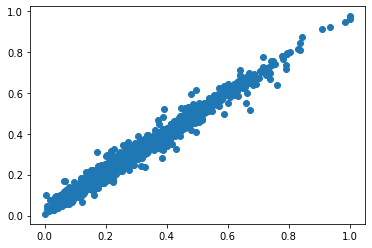

In [72]:
#PLotting graphs for RMSProp optimiser function
from matplotlib import pyplot as p
p.scatter(y_train,y_train_pre)

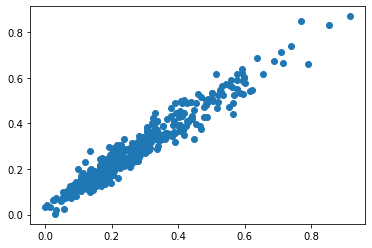

In [73]:
p.scatter(y_test,y_test_pre)